In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/wines_SPA.csv')

In [13]:
df.shape

(7500, 11)

In [3]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [4]:
# NOW TO GET AN OVERVIEW OF THE DATA
df.info()                   # WE CAN GET INFO ABOUT DATA TYPES AND MISSING VALUES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [5]:
# FOR STATISTICAL SUMMARY OF NUMERICAL COLUMNS
df.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [6]:
# TO CHECK CARDINALITY OF CATEGORICAL COLUMNS (NO. OF UNIQUE VALUES PER COLUMN)
df.nunique()

,0
winery,480
wine,847
year,71
rating,8
num_reviews,817
country,1
region,76
price,1292
type,21
body,4


In [7]:
# COUNT OF MISSING VALUES PER COLUMN
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]      # SHOW ONLY COLUMNS WITH MISSING VALUES
print(missing_values)

year          2
type        545
body       1169
acidity    1169
dtype: int64


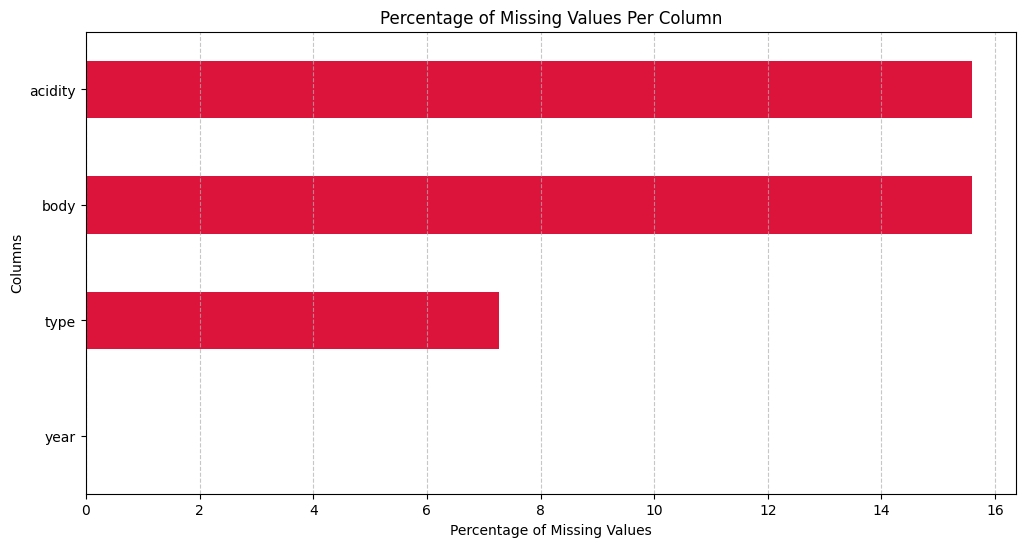

In [10]:
# CALCULATING MISSING VALUES PERCENTAGE
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values()

# PLOT MISSING VALUES AS BAR CHART
plt.figure(figsize=(12, 6))
missing_percent.plot(kind='barh', color='crimson')
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Columns")
plt.title("Percentage of Missing Values Per Column")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [11]:
# SO NOW FOR IMPUTATION LET'S USE KNN IMPUTER BECAUSE UNLIKE MEAN/MEDIAN, IT FINDS MOST RELEVANT DATA PATTERNS
from sklearn.impute import KNNImputer
num_cols = df.select_dtypes(include=[np.number]).columns   # ONLY NUMERICAL COLUMNS
imputer = KNNImputer(n_neighbors=5)
df[num_cols] = imputer.fit_transform(df[num_cols])

In [12]:
print("Missing values after imputation:\n", df.isnull().sum().sum())


Missing values after imputation:
 547


In [14]:
# FOR CATEGORICAL COLUMNS, LET'S CREATE AN UNKNOWN CATEGORY TO PREVENT BIAS FROM INCORRECT MODE IMPUTAION
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col].fillna("Unknown", inplace=True)


<ipython-input-14-6e0a6bb44069>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)


In [15]:
print("Missing values after imputation:\n", df.isnull().sum().sum())


Missing values after imputation:
 0


In [16]:
# DETECTING AND REMOVING DUPLICATE ROWS!!
duplicates = df.duplicated().sum()
print(f"Duplicate Rows Count: {duplicates}")

Duplicate Rows Count: 5476


In [17]:
# INSTEAD OF SIMPLE DROP_DUPLICATES() LET'S RESET INDEX TO AVOID ISSUES
df = df.drop_duplicates().reset_index(drop=True)


In [18]:
print(f"Duplicate Rows After Removal: {df.duplicated().sum()}")


Duplicate Rows After Removal: 0


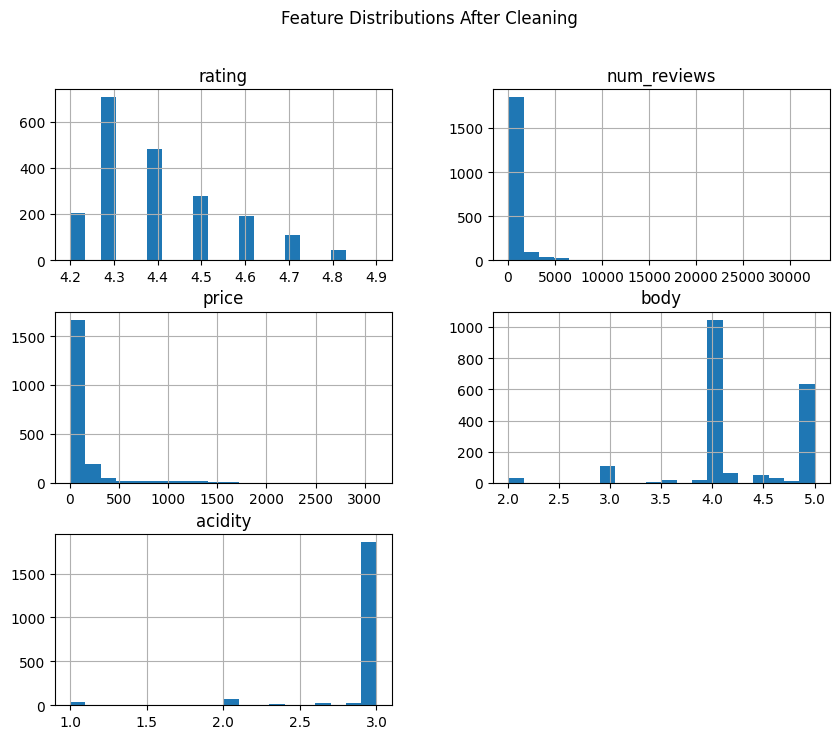

In [20]:
# VISUALISING DATA AFTER CLEANING
df.hist(figsize=(10, 8), bins=20)
plt.suptitle("Feature Distributions After Cleaning")
plt.show()

In [19]:
# NOW SAVING OUR CLEANED DATASET
df.to_csv('/content/wines_SPA_cleaned.csv', index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!
